In [2]:
cd flood_tool

/Users/wangziyou/Documents/GitHub/ads-deluge-wye/flood_tool


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from geo import *
from tool import *

IndentationError: expected an indented block (geo.py, line 208)

## Station reference, name and position (lat, lon)

In [4]:
# The data on measurement stations

df1 = pd.read_csv('./resources/stations.csv')
df1.tail()

,stationReference,stationName,latitude,longitude
1980,L3211,Hessle,53.719075,-0.434087
1981,Mitch1,Rainfall station,53.742978,-2.323663
1982,PCHURCH_TG_342,Peterchurch,52.041372,-2.955501
1983,SE730,LENSIDE GS,51.272544,0.525902
1984,VCHURCH-T_TG_341,Rainfall station,52.023749,-2.921750


In [5]:
print(len(df1))

1985


In [5]:
df1.isna().sum()

stationReference    0
stationName         4
latitude            7
longitude           7
dtype: int64

In [6]:
#    drop stations with no lat and lon data

remove_stations = df1[df1['latitude'].isna()]['stationReference'].values
df1.drop(index = df1[df1['latitude'].isna()].index, inplace=True);


In [7]:
print(df1.duplicated().sum())
#df1 = df1.drop_duplicates()

0


## Data for a wet day

In [6]:
# The data for a wet day

df2 = pd.read_csv('./resources/wet_day.csv')
df2.head()

/Users/wangziyou/opt/miniconda3/envs/environmental-data/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,dateTime,stationReference,parameter,qualifier,unitName,value
0,2021-05-07T00:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.000
1,2021-05-07T00:00:00Z,48155,rainfall,Tipping Bucket Raingauge,mm,0.000
2,2021-05-07T00:00:00Z,48105,rainfall,Tipping Bucket Raingauge,mm,0.000
3,2021-05-07T00:00:00Z,2927TH,level,Stage,mASD,0.795
4,2021-05-07T00:00:00Z,0710TH,level,Stage,mASD,1.964


In [9]:
print(len(df2))
print(df2['dateTime'].min(),'  ', df2['dateTime'].max())   # data for a 24hour period
print(df2['parameter'].unique())
print('units', df2['unitName'].unique())
print(len(df2['stationReference'].unique()))
print(df2['qualifier'].unique())

191470
2021-05-07T00:00:00Z    2021-05-07T23:59:00Z
['rainfall' 'level']
units ['mm' 'mASD']
1985
['Tipping Bucket Raingauge' 'Stage' 'Water' nan 'Logged' '1' '2'
 'Crest Tapping' 'Height']


In [10]:
print(df2.duplicated().sum())
df2 = df2.drop_duplicates()

191


In [11]:
df2.isna().sum()

dateTime             0
stationReference     0
parameter            0
qualifier           40
unitName             0
value                1
dtype: int64

In [12]:
df2 = df2.fillna(0)

In [13]:
# remove unwanted stations (with no lat lon)
for ref in remove_stations:
    df2 = df2.drop(index = df2[df2['stationReference']== ref].index) 
df2.reset_index(drop=True, inplace=True);

In [14]:
len(df2)

190510

In [15]:
# df2['value'] = pd.to_numeric(df2['value'], downcast="float")

In [16]:
values = []
for value in df2['value'].values:
    try:
        value = float(value)
    except ValueError:
        values.append(value)

In [17]:
values

['0.201|0.109',
 '0.260|0.267',
 '0.628|0.614',
 '0.209|0.200',
 '0.628|0.614',
 '0.200|0.109',
 '0.209|0.200',
 '0.260|0.257',
 '0.209|0.201',
 '0.109|0.196',
 '0.628|0.614',
 '0.209|0.201',
 '0.628|0.614',
 '0.194|0.109',
 '0.109|0.196',
 '0.628|0.614',
 '0.260|0.257',
 '0.209|0.200',
 '0.109|0.196',
 '0.278|0.269',
 '0.628|0.614',
 '0.209|0.200',
 '0.209|0.200',
 '0.279|0.283',
 '0.628|0.614',
 '0.109|0.195',
 '0.209|0.200',
 '0.628|0.614',
 '0.194|0.109',
 '0.192|0.109',
 '0.286|0.287',
 '0.209|0.200',
 '0.628|0.614',
 '0.209|0.200',
 '0.286|0.291',
 '0.628|0.614',
 '0.192|0.109',
 '0.209|0.200',
 '0.628|0.614',
 '0.286|0.288',
 '0.190|0.109',
 '0.286|0.288',
 '0.209|0.200',
 '0.190|0.109',
 '0.628|0.614',
 '0.292|0.287',
 '0.209|0.199',
 '0.628|0.614',
 '0.190|0.109',
 '0.629|0.614',
 '0.190|0.109',
 '0.294|0.287',
 '0.209|0.199',
 '0.628|0.614',
 '0.288|0.290',
 '0.190|0.109',
 '0.209|0.199',
 '0.209|0.199',
 '0.190|0.109',
 '0.296|0.288',
 '0.628|0.614',
 '0.199|0.208',
 '0.286|

In [18]:
# this is slooooow. change this.
for i in range(len(df2)):
    try:
        df2['value'][i] = float(df2['value'][i])
    except ValueError:
        df2['value'][i] = float(df2['value'][i].split('|')[0])

In [19]:
df2['value'] = pd.to_numeric(df2['value'], downcast="float")

In [20]:
wet_river_df = df2[df2['parameter']=='level']
wet_rain_df = df2[df2['parameter']=='rainfall']

In [21]:
# rainfall data every 15 mins 

In [22]:
print('river.   min:', wet_river_df['value'].min(), 'max:',wet_river_df['value'].max())
print('rainfall.   min:', wet_rain_df['value'].min(), 'max:',wet_rain_df['value'].max())

river.   min: -61.0 max: 83.0
rainfall.   min: 0.0 max: 3276.699951171875


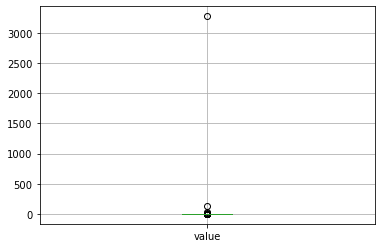

In [23]:
wet_rain_df[['value']].boxplot();

In [24]:
df2[df2['value'] == 3276.7]

,dateTime,stationReference,parameter,qualifier,unitName,value
70384,2021-05-07T08:45:00Z,564154,rainfall,Tipping Bucket Raingauge,mm,3276.699951


In [25]:
a = df2[df2['stationReference'] == '564154']
print(a[a['dateTime'] =='2021-05-07T09:00:00Z'])
print(a[a['dateTime'] =='2021-05-07T08:30:00Z'])

                   dateTime stationReference parameter  \
72624  2021-05-07T09:00:00Z           564154  rainfall   

                      qualifier unitName  value  
72624  Tipping Bucket Raingauge       mm    0.0  
                   dateTime stationReference parameter  \
69148  2021-05-07T08:30:00Z           564154  rainfall   

                      qualifier unitName  value  
69148  Tipping Bucket Raingauge       mm    0.0  


In [26]:
# change value
df2.loc[70384, 'value'] = 0.0

In [27]:
wet_rain_df = df2[df2['parameter']=='rainfall']

In [28]:
# wet_rain_df[wet_rain_df['value'] > 20]
# a = df2[df2['stationReference'] == '1140']
# print(a[a['dateTime'] =='2021-05-07T07:00:00Z'])
# print(a[a['dateTime'] =='2021-05-07T06:45:00Z'])
# print(a[a['dateTime'] =='2021-05-07T07:45:00Z'])

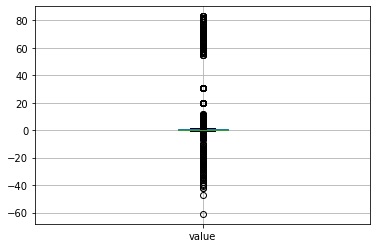

In [29]:
wet_river_df[['value']].boxplot();

In [30]:
wet_river_df['value'].values

array([0.795, 1.964, 1.045, ..., 1.15 , 1.15 , 1.15 ], dtype=float32)

In [31]:
wet_rain_df.sort_values(by='dateTime').groupby('stationReference')

In [32]:
wet_rain_df = wet_rain_df.sort_values(by='dateTime')
wet_rain_df[wet_rain_df['stationReference']=='E5726']['value'].values.sum()

0.0

In [33]:
rain_day = pd.DataFrame(wet_rain_df.groupby('stationReference')['value'].sum()).rename(columns={'value': 'rain_in_day'})

In [34]:
# pd.merge(wet_rain_df, rain_day, on="stationReference")   # rainfall stations

## Data for a typical day

In [35]:
# The data for a more typical day

df3 = pd.read_csv('./resources/typical_day.csv')
df3.head()

,dateTime,stationReference,parameter,qualifier,unitName,value
0,2021-10-10T00:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.000
1,2021-10-10T00:00:00Z,2206,level,Stage,mASD,0.000
2,2021-10-10T00:00:00Z,2431TH,level,Stage,mASD,1.358
3,2021-10-10T00:00:00Z,E24632,rainfall,Tipping Bucket Raingauge,mm,0.000
4,2021-10-10T00:00:00Z,2107,level,Stage,mASD,0.662


In [36]:
print(len(df3))
print(df3['dateTime'].min(),'  ', df3['dateTime'].max())   # data for a 24hour period
print('units', df3['unitName'].unique())
print(len(df3['stationReference'].unique()))
print(df3['qualifier'].unique())

193127
2021-10-10T00:00:00Z    2021-10-10T23:59:00Z
units ['mm' 'mASD']
1985
['Tipping Bucket Raingauge' 'Stage' '2' '1' 'Water' 'Logged' 'Height'
 'Crest Tapping' nan]


In [37]:
print(df3.duplicated().sum())
df3.drop_duplicates(inplace=True)

96


In [38]:
df3.isna().sum()

dateTime             0
stationReference     0
parameter            0
qualifier           96
unitName             0
value                1
dtype: int64

In [39]:
df3 = df3.fillna(0)

In [40]:
# remove unwanted stations (with no lat lon)
for ref in remove_stations:
    df3 = df3.drop(index = df3[df3['stationReference']== ref].index) 
df3.reset_index(drop=True, inplace=True)

In [41]:
typical_river_df = df3[df3['parameter']=='level']
typical_rain_df = df3[df3['parameter']=='rainfall']

In [42]:
print(len(df3['dateTime'].unique()))
print(len(typical_rain_df['dateTime'].unique()))
print(len(typical_river_df['dateTime'].unique()))

1541
96
1541


In [43]:
print(len(df2['dateTime'].unique()))
print(len(wet_rain_df['dateTime'].unique()))
print(len(wet_river_df['dateTime'].unique()))

1509
96
1509


In [44]:
print('rainfall.   min:', typical_rain_df['value'].min(), 'max:',typical_rain_df['value'].max())

rainfall.   min: 0.0 max: 14.0


river.   min: -77.0 max: 2147484.0


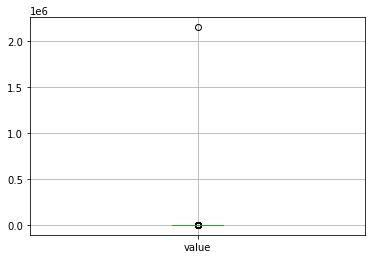

In [45]:
# river
print('river.   min:', typical_river_df['value'].min(), 'max:',typical_river_df['value'].max())

typical_river_df[['value']].boxplot();

In [46]:
typical_river_df[typical_river_df['value']==2147484.0]
 # typical_river_df[typical_river_df['stationReference'] == '0144TH']

,dateTime,stationReference,parameter,qualifier,unitName,value
78159,2021-10-10T09:44:24Z,0144TH,level,Stage,mASD,2147484.0


In [47]:
a = df3[df3['stationReference'] == '0144TH']
print(a[a['dateTime'] =='2021-10-10T09:45:00Z'])
print(a[a['dateTime'] =='2021-10-10T10:00:00Z'])

                   dateTime stationReference parameter qualifier unitName  \
78447  2021-10-10T09:45:00Z           0144TH     level     Stage     mASD   

       value  
78447  0.909  
                   dateTime stationReference parameter qualifier unitName  \
81890  2021-10-10T10:00:00Z           0144TH     level     Stage     mASD   

       value  
81890  0.906  


In [48]:
# change value
df3.loc[78159 , 'value'] = 0.909

In [49]:
typical_river_df = df3[df3['parameter']=='level']
typical_rain_df = df3[df3['parameter']=='rainfall']

## merging but with losing data :
## .... wet data

In [50]:
# merge1 = pd.merge(df1, pd.DataFrame(df2.groupby('stationReference').parameter.unique()), on="stationReference")
# merge1

In [51]:
df1 = df1.sort_values('stationReference').set_index('stationReference')

In [52]:
df1.duplicated().sum()   # ??

5

In [53]:
for i, num in enumerate(df1.duplicated().values):
    if num == True:
        print(i)
    else:
        pass
    
# df1.iloc[1225,:]

1225
1233
1592
1889
1922


In [54]:
# rainfall wet day

merge1 = pd.merge(wet_rain_df, df1, on="stationReference").rename(columns={'value': 'wet_day'})
 # should be 85422

In [55]:
# river wet day

merge2 = pd.merge(wet_river_df, df1, on="stationReference").rename(columns={'value': 'wet_day'})


In [56]:
# wet day data     2021-05-07 river+rainfall
# wet_day = pd.concat([merge1, merge2]).reset_index(drop=True)
# wet_day

wet_day = pd.merge(df2, df1, on="stationReference").rename(columns={'value': 'wet_day'})
wet_day

,dateTime,stationReference,parameter,qualifier,unitName,wet_day,stationName,latitude,longitude
0,2021-05-07T00:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
1,2021-05-07T01:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
2,2021-05-07T02:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
3,2021-05-07T03:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
4,2021-05-07T04:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
...,...,...,...,...,...,...,...,...,...
187721,2021-05-07T22:45:00Z,E13590,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,50.953747,-1.533691
187722,2021-05-07T23:00:00Z,E13590,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,50.953747,-1.533691
187723,2021-05-07T23:15:00Z,E13590,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,50.953747,-1.533691
187724,2021-05-07T23:30:00Z,E13590,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,50.953747,-1.533691


## ... typical data

In [57]:
# rainfall typical day

merge3 = pd.merge(typical_rain_df, df1, on="stationReference").rename(columns={'value': 'typical_day'})

In [58]:
# river typical day

merge4 = pd.merge(typical_river_df, df1, on="stationReference").rename(columns={'value': 'typical_day'})

In [59]:
# typical day data     2021-05-07 river+rainfall
#typical_day = pd.concat([merge3, merge4]).reset_index(drop=True)

typical_day = pd.merge(df3, df1, on="stationReference").rename(columns={'value': 'typical_day'})
typical_day

,dateTime,stationReference,parameter,qualifier,unitName,typical_day,stationName,latitude,longitude
0,2021-10-10T00:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
1,2021-10-10T01:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
2,2021-10-10T02:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
3,2021-10-10T03:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
4,2021-10-10T04:00:00Z,E5726,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,52.611622,-0.461792
...,...,...,...,...,...,...,...,...,...
192354,2021-10-10T21:15:00Z,598928,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,54.524262,-2.505948
192355,2021-10-10T21:30:00Z,598928,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,54.524262,-2.505948
192356,2021-10-10T21:45:00Z,598928,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,54.524262,-2.505948
192357,2021-10-10T22:00:00Z,598928,rainfall,Tipping Bucket Raingauge,mm,0.0,Rainfall station,54.524262,-2.505948


In [60]:
# wet_day.to_csv()

# typical_day.to_csv()

## Adding a class

#### rainfall classifier

dry: 0 

less than 2 mm per hour     slight: 1

(0.5 per 15min)

2mm to 4 mm per hour        moderate: 2

0.5 to 1

4mm to 50 mm per hour       heavy: 3

1 to 12.5

more than 50mm per hour     violent: 4

12.5

In [61]:
merge3 = merge3.sort_values(by='dateTime').set_index('dateTime')
a = merge3['typical_day'].values

print(a)
b = np.zeros_like(a)
b = np.where(np.logical_and(a > 0, a < 0.5), 1, b)
b = np.where(np.logical_and(a >= 0.5, a < 1), 2, b)
b = np.where(np.logical_and(a >= 1, a < 12.5), 3, b)
b = np.where(a >= 12.5, 4, b)
print(b)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [62]:
merge3['aclass'] = b

In [63]:
# hour = merge3.sort_values(by='dateTime').set_index('dateTime').loc['2021-10-10T00:00:00Z':'2021-10-10T00:45:00Z']
# hour
#hour.groupby('stationReference')['typical_day'].sum()

In [64]:
# times = ['2021-10-10T00:00:00Z', '2021-10-10T00:45:00Z', '2021-10-10T01:00:00Z', '2021-10-10T01:45:00Z']
# hour = merge3.sort_values(by='dateTime').set_index('dateTime').loc['2021-10-10T00:00:00Z':'2021-10-10T00:45:00Z']
# hour.groupby('stationReference')['typical_day'].sum()

# def river_class(value):
#     if value < 0 :
#         return 1
#     else:
#         return 2
# river_class(merge4['typical_day'])
# merge4.assign(aclass =river_class(merge4['typical_day']))

In [65]:
merge4 = merge4.sort_values(by='dateTime').set_index('dateTime')
a = merge4['typical_day'].values

In [66]:
q3, q1 = np.percentile(a, [75 ,25])
print(q3, q1)
print(np.median(a))

0.688 0.134
0.287


In [67]:
# print(a)
# b = np.zeros_like(a)
# b = np.where(a < 0.13, 'low', b)
# b = np.where(np.logical_and(a >= 0.13, a < 0.29), 'normal', b)
# b = np.where(np.logical_and(a >= 0.29, a < 0.69), 'normal_high', b)
# b = np.where(np.logical_and(a >= 0.69, a < 1.5), 'high', b)
# b = np.where(a >= 1.5, 'v_high', b)
# print(b)

print(a)
b = np.zeros_like(a)
b = np.where(a < 0.13, 0, b)
b = np.where(np.logical_and(a >= 0.13, a < 0.29), 1, b)
b = np.where(np.logical_and(a >= 0.29, a < 0.69), 2, b)
b = np.where(np.logical_and(a >= 0.69, a < 1.5), 3, b)
b = np.where(a >= 1.5, 4, b)
print(b)

[0.    0.439 0.299 ... 0.323 1.195 0.323]
[0. 2. 2. ... 2. 3. 2.]


In [68]:
merge4['aclass'] = b

In [69]:
typical_day = pd.concat([merge3, merge4]).reset_index(drop=True)
typical_day

,stationReference,parameter,qualifier,unitName,typical_day,stationName,latitude,longitude,aclass
0,E5726,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,52.611622,-0.461792,0.0
1,1819,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,52.178577,-2.411624,0.0
2,286392TP,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,51.400709,-0.284238,0.0
3,1121,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,52.718322,-2.717219,0.0
4,380002TP,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,51.571638,-0.289354,0.0
...,...,...,...,...,...,...,...,...,...
192354,E8293,level,Stage,mASD,0.323,Isfield weir,50.951995,0.074349,2.0
192355,E1550,level,Stage,mASD,1.195,Town Lock,51.194615,0.278452,3.0
192356,E8293,level,Stage,mASD,0.323,Isfield weir,50.951995,0.074349,2.0
192357,E1550,level,Stage,mASD,1.195,Town Lock,51.194615,0.278452,3.0


In [70]:
# WET DAY
merge1 = merge1.sort_values(by='dateTime').set_index('dateTime')
a = merge1['wet_day'].values

print(a)
b = np.zeros_like(a)
b = np.where(np.logical_and(a > 0, a < 0.5), 1, b)
b = np.where(np.logical_and(a >= 0.5, a < 1), 2, b)
b = np.where(np.logical_and(a >= 1, a < 12.5), 3, b)
b = np.where(a >= 12.5, 4, b)
print(b)

merge1['aclass'] = b

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [71]:
merge2 = merge2.sort_values(by='dateTime').set_index('dateTime')
a = merge2['wet_day'].values

print(a)
b = np.zeros_like(a)
b = np.where(a < 0.13, 0, b)
b = np.where(np.logical_and(a >= 0.13, a < 0.29), 1, b)
b = np.where(np.logical_and(a >= 0.29, a < 0.69), 2, b)
b = np.where(np.logical_and(a >= 0.69, a < 1.5), 3, b)
b = np.where(a >= 1.5, 4, b)
print(b)

merge2['aclass'] = b

[0.795 0.609 2.305 ... 1.15  1.15  1.15 ]
[3. 2. 4. ... 3. 3. 3.]


In [72]:
wet_day = pd.concat([merge1, merge2]).reset_index(drop=True)
wet_day

,stationReference,parameter,qualifier,unitName,wet_day,stationName,latitude,longitude,aclass
0,E5726,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,52.611622,-0.461792,0.0
1,1155,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,52.417004,-1.125840,0.0
2,022994,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,54.624106,-1.870637,0.0
3,238777TP,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,51.736595,0.223782,0.0
4,43228,rainfall,Tipping Bucket Raingauge,mm,0.000,Rainfall station,50.968057,-2.158729,0.0
...,...,...,...,...,...,...,...,...,...
187721,4098,level,Stage,mASD,0.646,Keadby,53.591975,-0.738178,2.0
187722,E1550,level,Stage,mASD,1.150,Town Lock,51.194615,0.278452,3.0
187723,E1550,level,Stage,mASD,1.150,Town Lock,51.194615,0.278452,3.0
187724,E1550,level,Stage,mASD,1.150,Town Lock,51.194615,0.278452,3.0


## Save dataframes

In [ ]:
# wet_day.to_csv()

# typical_day.to_csv()

## Mapping

In [ ]:
def plot_circle(lat, lon, radius, map=None, **kwargs):
    """
    Plot a circle on a map (creating a new folium map instance if necessary).
    Parameters
    ----------
    lat: float
        latitude of circle to plot (degrees)
    lon: float
        longitude of circle to plot (degrees)
    radius: float
        radius of circle to plot (m)
    map: folium.Map
        existing map object
    Returns
    -------
    Folium map object
    Examples
    --------
    >>> import folium
    >>> armageddon.plot_circle(52.79, -2.95, 1e3, map=None)
    """

    if not map:
        map = folium.Map(location=[lat, lon], control_scale=True)

    folium.Circle(location=[lat, lon], radius=radius, fill=True,
                  fillOpacity=0.6, **kwargs).add_to(map)

    return map

In [ ]:
plot_circle(53.719075, -0.434087, radius=10000)

In [ ]:
# folium marker for station can give name and reference

In [ ]:
map = plot_circle(53., 0, 2000.) #Plots a circle of radius 2000 m at the lat, lon: 53., 0.

folium.Marker(location=(53, 0.1), 
                  popup='This is my popup',
                  icon=folium.Icon(color='black', icon='info-sign')).add_to(map)
map